In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import scipy.stats
import sklearn.model_selection
import h5py

from pathlib import Path
import tensorflow as tf

from tqdm.auto import tqdm
tqdm.get_lock().locks = []

from IPython.core.display import display, HTML, Latex
import ipywidgets as widgets

import skimage.segmentation

import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

import plotly.offline as ply
import plotly.graph_objs as plygo
import cufflinks as cf
ply.init_notebook_mode(connected=False)
cf.set_config_file(offline=True, world_readable=False, theme='white')

In [3]:
from datasets.hsi_dataset import HSIDataset
from compression.spectral_ae import Autoencoder
from compression.classifier import Classifier

In [3]:
datasets = {'Suburban': '/storage/kiran/data/suburban/20170820_Urban_Ref_Reg_Subset.tif',
            'Urban': '/storage/kiran/data/urban/20170820_Urban2_INT_Final.tif',
            'Forest': '/storage/kiran/data/forest/20170820_Forest_Final_INT.tif'
           }

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
for idx, dataset_name in enumerate(datasets):
    dataset = HSIDataset(datasets[dataset_name], dataset_name)
    train_categories, train_pixels = dataset.trainingset
    test_categories, test_pixels  = dataset.testset
        
    if dataset.name=='Suburban':
        dataset.rgb_gain=4
    elif dataset.name=='Urban':
        dataset.rgb_gain=2
    elif dataset.name=='Forest':
        dataset.rgb_gain=4
        
        
#     colors = {'Suburban': ['firebrick','lightgreen', 'black', 'lightblue'],
#               'Urban':    ['firebrick','black', 'lightgreen'],
#               'Forest':   ['lightgreen','black']
#              }

    colors = {'Suburban': ['orange','green', 'darkgray', 'cyan'],
              'Urban':    ['orange','darkgray', 'green'],
              'Forest':   ['green','darkgray']
             }


    categories = {**train_categories, **test_categories}
    gt = train_pixels + test_pixels
    
    rgb = dataset.rgb_image.copy()
    rgb[dataset.mask_rgb] = 0
    rgb[np.stack([np.where(gt > 0, True, False)]*3, 2)] = 0
    
    base_img = skimage.segmentation.mark_boundaries(rgb, gt, mode='outter', color=(1, 1, 1))
    colored_segs = skimage.color.label2rgb(gt,
                                           alpha=1,
                                           image_alpha=1,
                                           bg_label=0,
                                           colors=colors[dataset_name]
                                           )
    base_img = colored_segs + base_img
    axs[idx].imshow(base_img)
    axs[idx].grid(False)
    axs[idx].axis(False)
    axs[idx].set_title(f"{dataset.name}", fontsize=30)
    

cmap = matplotlib.colors.ListedColormap(['orange','green', 'cyan', 'darkgray'])
bounds = [0,1,2,3,4]
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
cbar_ax = fig.add_axes([0.2, 0.08, 0.6, 0.03])
cbar = matplotlib.colorbar.ColorbarBase(cbar_ax, cmap=cmap,
                            norm=norm,
                            orientation='horizontal')

cbar.set_ticks([0.5, 1.5, 2.5, 3.5])
cbar.set_ticklabels(['rooftop','vegetation/lawn','asphalt','shadow'])
cbar.ax.tick_params(labelsize=24) 
plt.subplots_adjust(hspace=0, wspace=0.002)
filename = f'/storage/kiran/results/charts/image_shapes_overlay.png'
plt.savefig(filename, dpi=300, bbox='tight', transparent=True)
plt.show()

# Image Stats

In [ ]:
for dataset_name, dataset_path in datasets.items():
    dataset = HSIDataset(file_path=dataset_path, name=dataset_name)
    res_w, res_h = dataset.raster.res
    w, h = dataset.raster.width, dataset.raster.height
    area = (w * res_w) * (h *res_h)
    area_pixels = (w*h)    
    no_data_area = dataset.mask_band.sum()*(res_w * res_h)
    
    effective_area = area - no_data_area
    
    print(f"{dataset_name}")
    print(f"Area (pixels): {area_pixels} ({w}x{h})")    

    print(f"Area (m^2): {np.ceil(area)} ({np.ceil(w*res_w)}x{np.ceil(h*res_h)}) ")
    print(f"No data area (m^2): {no_data_area}")
    
    print(f"Effective Area (m^2): {np.ceil(effective_area)}")
    print(f"---")


# Results with 95% compression

In [1]:
from compression.pca import PCA
from compression.ica import ICA
from compression.kpca import KPCA
from compression.ae import AE
from compression.dae import DAE
from compression.classifier import Classifier

models = [AE, DAE, KPCA, PCA, ICA]
# models = [PCA]

/storage/kiran/models/AE_1/spectral_ae_Suburban_HSI_15.h5
(457568, 301)


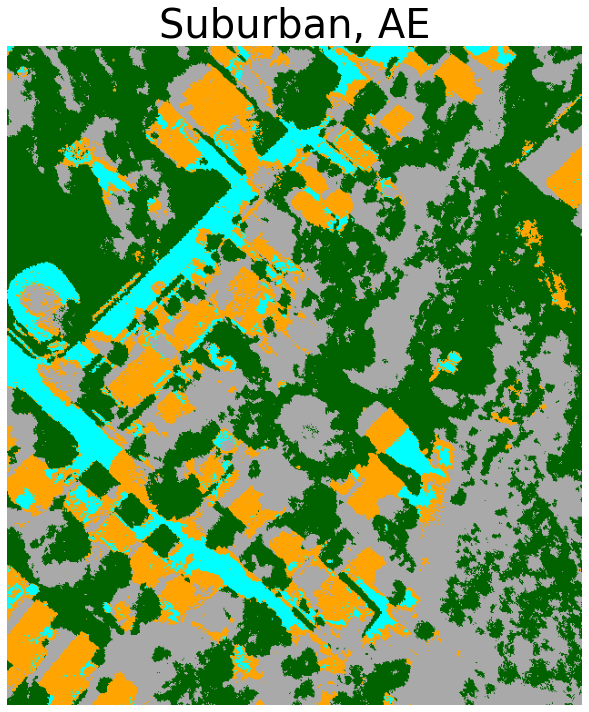

----------------------------------------
/storage/kiran/models/DAE_1/spectral_ae_Suburban_HSI_15.h5
(457568, 301)


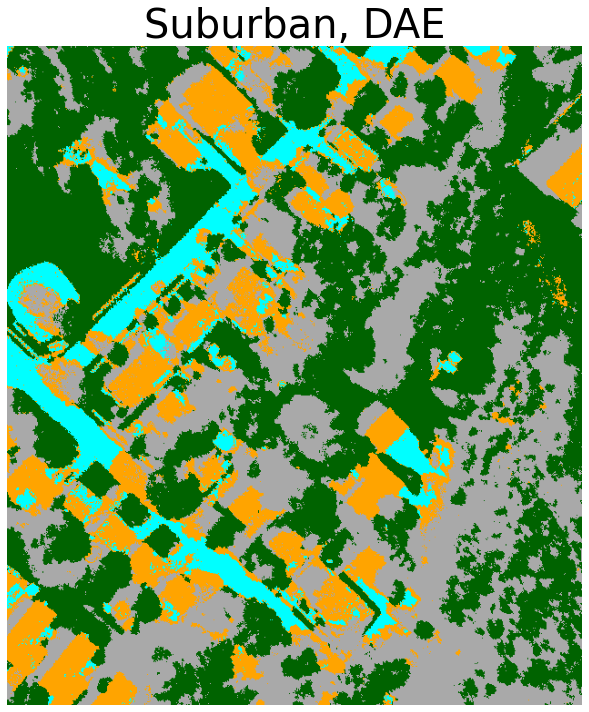

----------------------------------------
/storage/kiran/models/KPCA_1/kpca_Suburban_HSI_15.pickle.bin
(457568, 301)


(45757, 15)
(45757, 15)
(45757, 15)
(45757, 15)
(45757, 15)
(45757, 15)
(45757, 15)
(45757, 15)
(45756, 15)
(45756, 15)

(457568, 15)


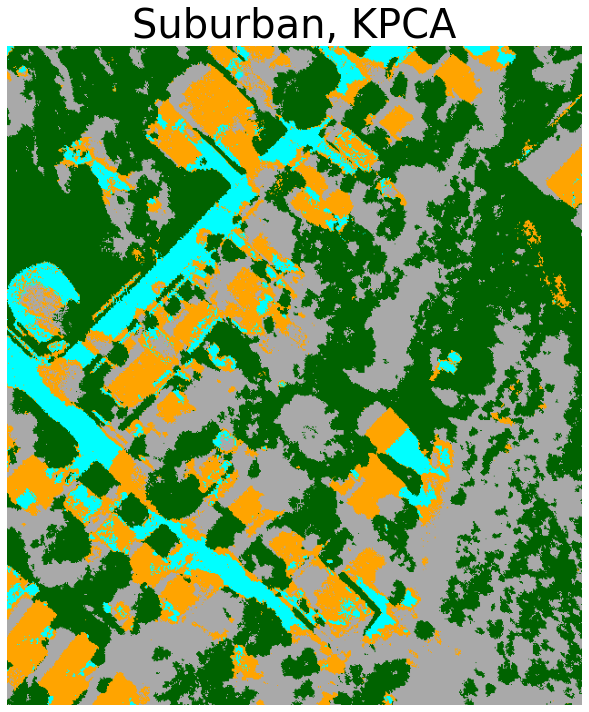

----------------------------------------
/storage/kiran/models/PCA_1/pca_Suburban_HSI_15.faiss.bin
(457568, 301)


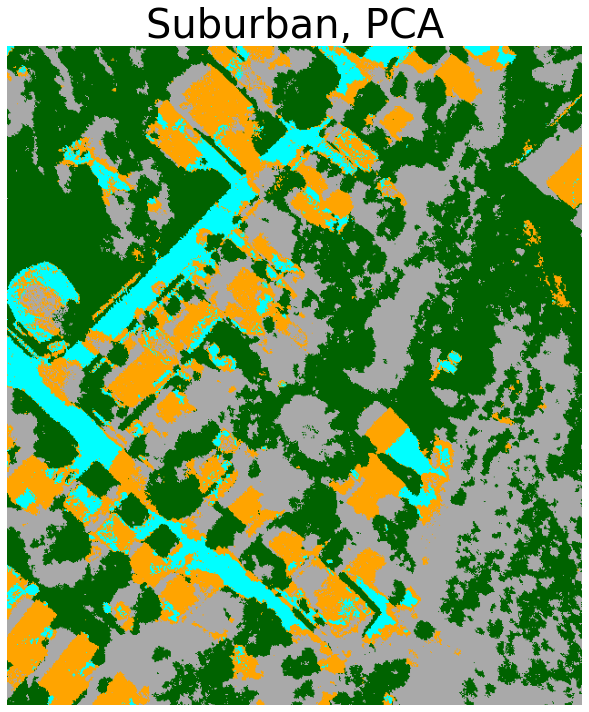

----------------------------------------
/storage/kiran/models/ICA_1/ica_Suburban_HSI_15.pickle.bin
(457568, 301)


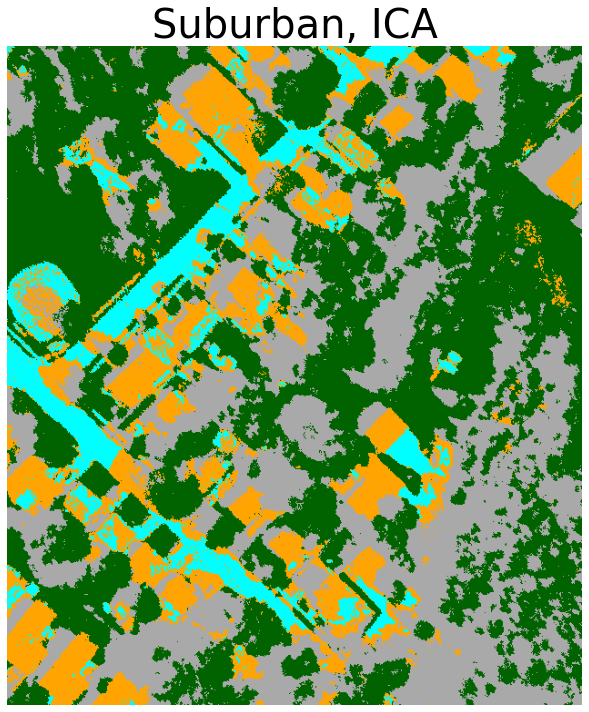

----------------------------------------
/storage/kiran/models/AE_3/spectral_ae_Urban_HSI_15.h5
(1458335, 301)


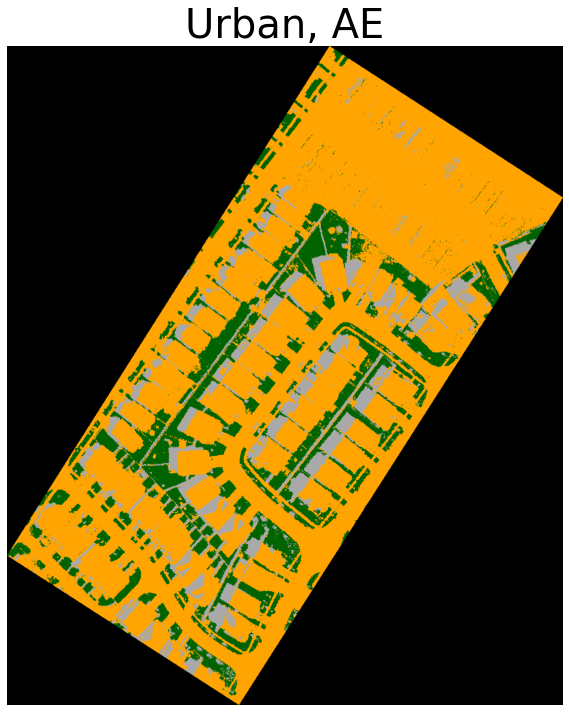

----------------------------------------
/storage/kiran/models/DAE_9/spectral_ae_Urban_HSI_15.h5
(1458335, 301)


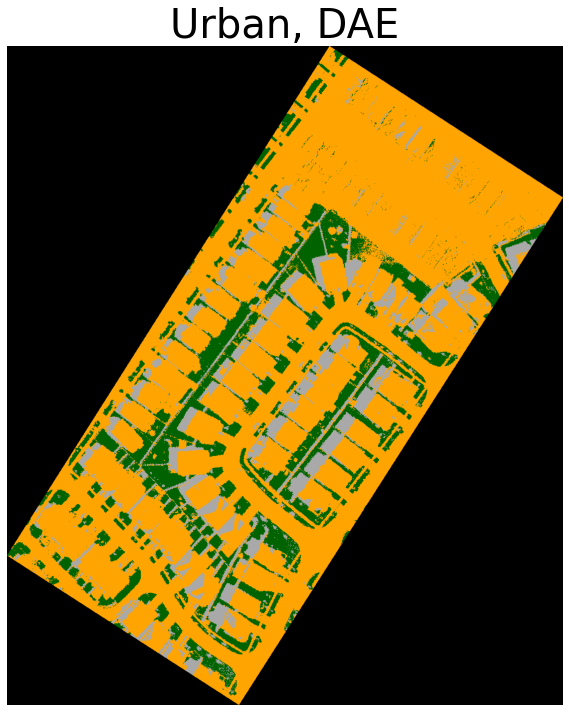

----------------------------------------
/storage/kiran/models/KPCA_1/kpca_Urban_HSI_15.pickle.bin
(1458335, 301)


(145834, 15)
(145834, 15)
(145834, 15)
(145834, 15)
(145834, 15)
(145833, 15)
(145833, 15)
(145833, 15)
(145833, 15)
(145833, 15)

(1458335, 15)


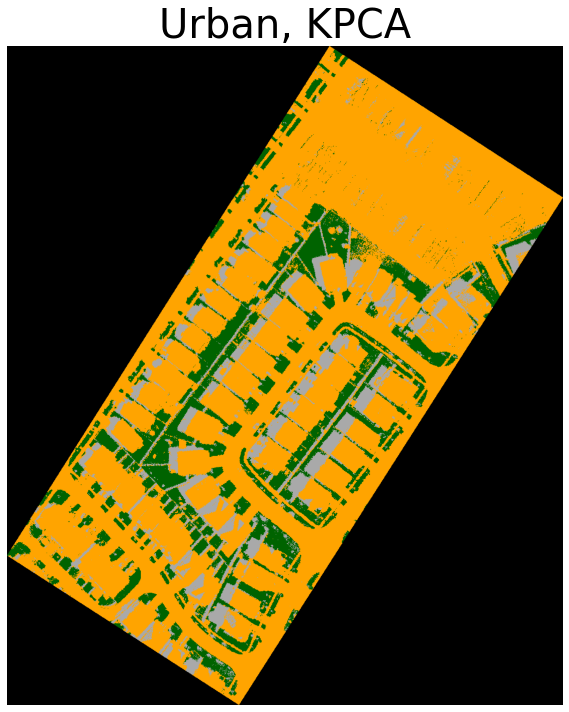

----------------------------------------
/storage/kiran/models/PCA_1/pca_Urban_HSI_15.faiss.bin
(1458335, 301)


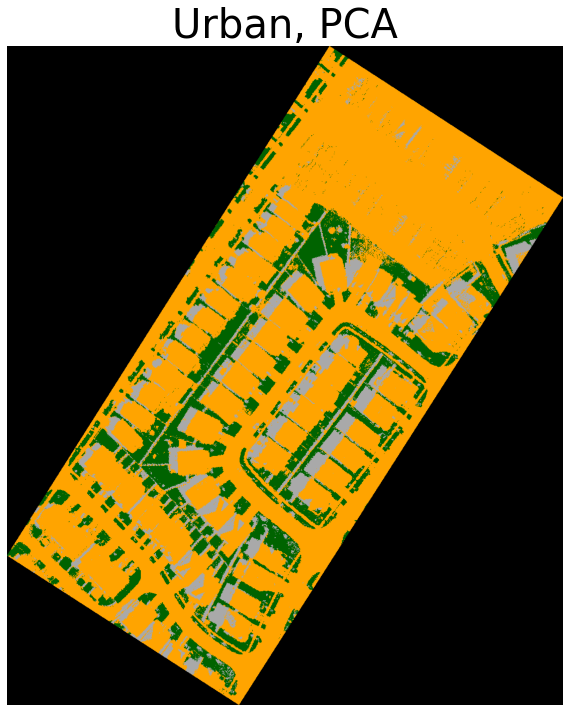

----------------------------------------
/storage/kiran/models/ICA_1/ica_Urban_HSI_15.pickle.bin
(1458335, 301)


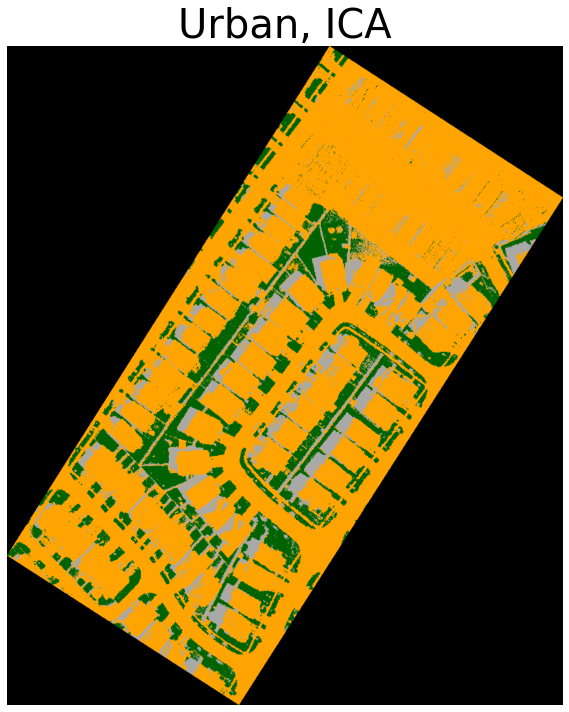

----------------------------------------
/storage/kiran/models/AE_6/spectral_ae_Forest_HSI_12.h5
(571896, 251)


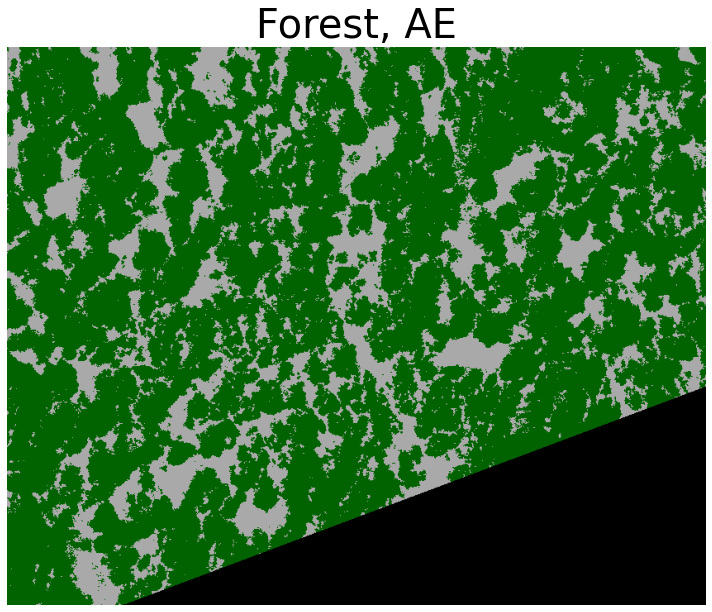

----------------------------------------
/storage/kiran/models/DAE_8/spectral_ae_Forest_HSI_12.h5
(571896, 251)


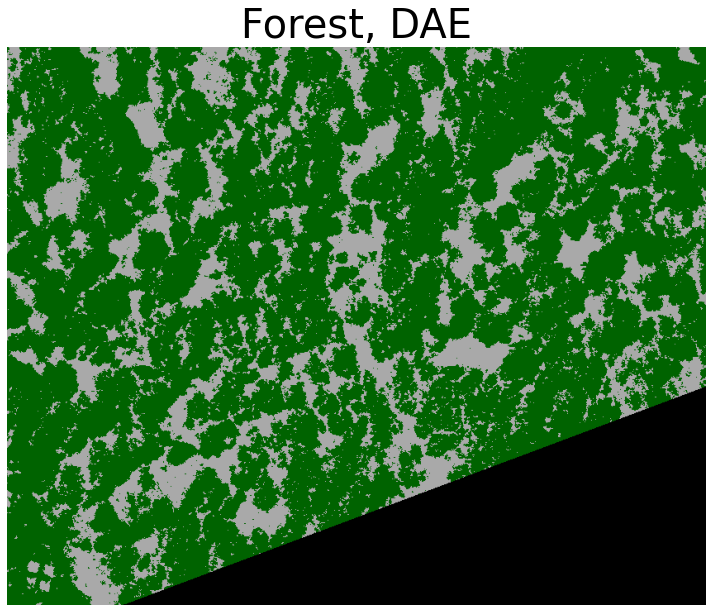

----------------------------------------
/storage/kiran/models/KPCA_1/kpca_Forest_HSI_12.pickle.bin
(571896, 251)


(57190, 12)
(57190, 12)
(57190, 12)
(57190, 12)
(57190, 12)
(57190, 12)
(57189, 12)
(57189, 12)
(57189, 12)
(57189, 12)

(571896, 12)


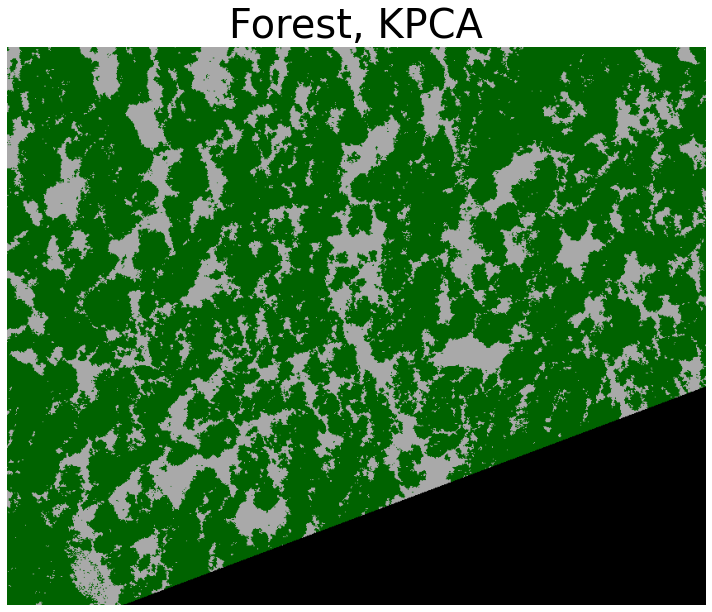

----------------------------------------
/storage/kiran/models/PCA_1/pca_Forest_HSI_12.faiss.bin
(571896, 251)


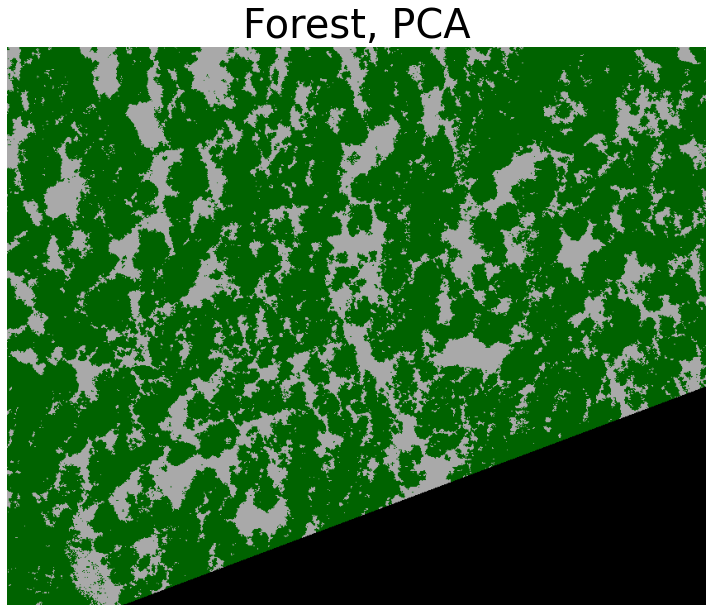

----------------------------------------
/storage/kiran/models/ICA_1/ica_Forest_HSI_12.pickle.bin
(571896, 251)


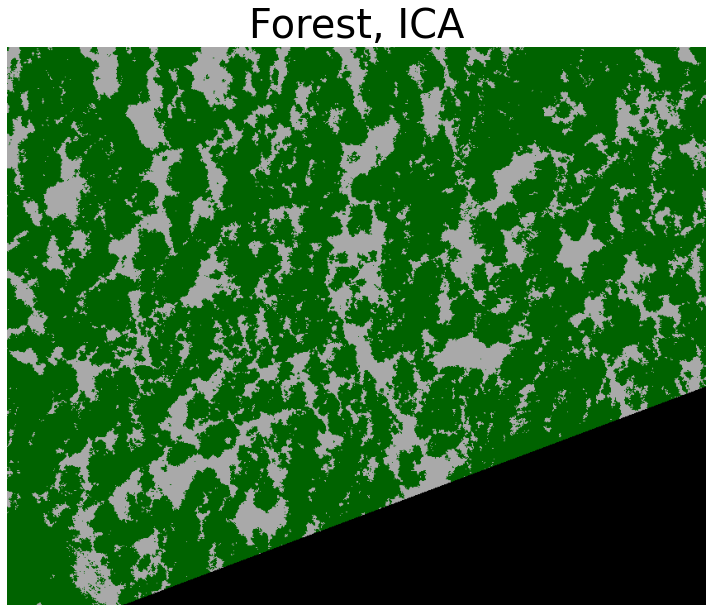

----------------------------------------


In [6]:
compression_rate = .95

datasets = {'Suburban': '/storage/kiran/data/suburban/20170820_Urban_Ref_Reg_Subset.tif',
            'Urban': '/storage/kiran/data/urban/20170820_Urban2_INT_Final.tif',
            'Forest': '/storage/kiran/data/forest/20170820_Forest_Final_INT.tif'
           }

colors = {'Suburban': ['orange','darkgreen', 'darkgray', 'cyan'],
          'Urban':    ['orange','darkgray', 'darkgreen'],
          'Forest':   ['darkgreen','darkgray']
         }


for idx, dataset_name in enumerate(datasets):
    dataset = HSIDataset(datasets[dataset_name], dataset_name)        
    n_components = int(dataset.n_bands * (1 - compression_rate))
    for model in models:  
        h5_files = Path(f'/storage/kiran/models/').glob(f'{model.__name__}*/*_{dataset_name}_HSI_{n_components}.*')

        # ------
        # Search for the best loss in case of AE or DAE
        if model.__name__=='DAE' or model.__name__=='AE':
            current_loss = 99
            selected_file = ""
            for file in h5_files:
                h = h5py.File(file,'r')
                loss = h['hparams/loss'][-1]
                if loss<current_loss:
                    selected_file = file
                    current_loss = loss
        else:
            selected_file = list(h5_files)[-1]
        # ------     
        
        m = model.load(selected_file)
        
        if model.__name__=='DAE' or model.__name__=='AE':
            compress = m.compress
        elif model.__name__=='ICA' or model.__name__=='KPCA':
            compress = m.transform
        elif model.__name__=='PCA':
            compress = m.apply_py
            
        print(selected_file)
        X = dataset.feature_vectors["HSI"].reshape(-1, dataset.n_bands)        
        print(X.shape)

        
        # ------- Train classifier first
        train_categories, train_pixels = dataset.trainingset
        test_categories, test_pixels = dataset.testset

        categories = {**train_categories, **test_categories}
        gt = train_pixels + test_pixels
        y = gt.reshape(dataset.n_pixels)
        
        gt_df = pd.DataFrame(y, columns=["category"])
        gt_df = gt_df[gt_df.category > 0]
        train_pixels, test_pixels = sklearn.model_selection.train_test_split(
            gt_df, train_size=0.5, stratify=gt_df.values, random_state=42
        )

        index_train_pixels = train_pixels[train_pixels.category > 0].index

        y_train = y[index_train_pixels].ravel()        
        X_train = X[index_train_pixels]
        
        X_train_compressed = compress(X_train)
                
        classifier = Classifier(dataset_name, dimensions=n_components)
        classifier.train(data=X_train_compressed, targets=y_train)
        # ------- classifier trained
                                        
        if model.__name__=='KPCA':
            X_compressed = []
            for x_train_block in tqdm(np.array_split(X, 10)):
                X_compressed.append(compress(x_train_block))
                print(X_compressed[-1].shape)

            X_compressed = np.vstack(X_compressed)
            print(X_compressed.shape)            
        else:
            X_compressed = compress(X)
                    
        predicted = classifier.predict(X_compressed).reshape(dataset.n_rows, dataset.n_cols)
        predicted[dataset.mask_band]=0
            
        
        # --- Plot Figure        
        fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,10), gridspec_kw={'wspace':0, 'hspace':0}, squeeze=True)
        axs = [axs]
        
        rgb = dataset.rgb_image.copy()
        rgb[dataset.mask_rgb] = 0
    
        # base_img = skimage.segmentation.mark_boundaries(rgb, gt, mode='outter', color=(1, 1, 1))
        colored_segs = skimage.color.label2rgb(predicted,
                                               alpha=0,
                                               image_alpha=0,
                                               bg_label=0,
                                               colors=colors[dataset_name]
                                               )
        #base_img = colored_segs + rgb
        base_img = colored_segs
        axs[0].imshow(base_img)
        axs[0].grid(False)
        axs[0].axis(False)
        axs[0].set_title(f"{dataset_name}, {model.__name__}", fontsize=40)
    

#         cmap = matplotlib.colors.ListedColormap(['firebrick','lightgreen', 'lightblue', 'black'])
#         bounds = [0,1,2,3,4]
#         norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
#         cbar_ax = fig.add_axes([0.2, 0.08, 0.6, 0.03])
#         cbar = matplotlib.colorbar.ColorbarBase(cbar_ax, cmap=cmap, 
#                                                 norm=norm,
#                                                 orientation='horizontal')
#         cbar.set_ticks([0.5, 1.5, 2.5, 3.5])
#         cbar.set_ticklabels(['rooftop','vegetation/lawn','asphalt','shadow'])
#         cbar.ax.tick_params(labelsize=24) 

        #plt.subplots_adjust(hspace=0, wspace=0.002)
        filename = f'/storage/kiran/results/charts/results_rgb_overlay_{dataset_name}_{model.__name__}.pdf'
        plt.tight_layout()
        plt.savefig(filename, transparent=True)        
        plt.show()                    
        print('-'*40)    